## Description

In this notebook we process and interprit the data we have collected from Dimensions and arXiv. We also generate the .RIS file we needed to nenerate the visualization through VOSviwer.

In [239]:
# Loading necessary packages
import feedparser as fp
import urllib
import requests
import string
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import unidecode
import networkx as nx
import decorator

In [240]:
# Creating the dictionary for interpreting how arXiv stores the subfields data
Categories = {
    "math.AG" : 'Algebraic Geometry',
    "math.AT" : 'Algebraic Topology',
    "math.AP" : 'Analysis of PDEs',
    "math.CT" : 'Category Theory',
    "math.CA" : 'Classical Analysis and ODEs',
    "math.CO" : 'Combinatorics',
    "math.AC" : 'Commutative Algebra',
    "math.CV" : 'Complex Variables',
    "math.DG" : 'Differential Geometry',
    "math.DS" : 'Dynamical Systems',
    "math.FA" : 'Functional Analysis',
    "math.GM" : 'General Math',
    "math.GN" : 'Genral Topology',
    "math.GT" : 'Geometric Topology',
    "math.GR" : 'Group Theory',
    "math.HO" : 'History and Overview',
    "math.IT" : 'Information Theory',
    "math.KT" : 'K-Theory and Homology',
    "math.LO" : 'Logic',
    "math.MP" : 'Mathematical Physics',
    "math.MG" : 'Metric Geometry',
    "math.NT" : 'Number Theory',
    "math.NA" : 'Numerical Analysis',
    "math.OA" : 'Operator Algebras',
    "math.OC" : 'Optimization and Control',
    "math.PR" : 'Probability',
    "math.QA" : 'Quantam Algebra',
    "math.RT" : 'Representation Theory',
    "math.RA" : 'Rings and Algebras',
    "math.SP" : 'Spectral Theory',
    "math.ST" : 'Statistics Theory',
    "math.SG" : 'Symplectic Geometry',
    "stat.AP" : 'Applications',
    "stat.CO" : 'Computation',
    "stat.ME" : 'Methodology',
    "stat.ML" : 'Machine Learning',
    "stat.OT" : 'Other Statistics',
    "stat.TH" : 'Statistics Theory',
    "cs.AI" : 'Artificial Intelligence',
    "cs.AR" : 'Hardware Architecture',
    "cs.CC" : 'Computational Complexity',
    "cs.CE" : 'Computational Engineering, Finance, and Science',
    "cs.CG" : 'Computational Geometry',
    "cs.CL" : 'Computation and Language',
    "cs.CR" : 'Cryptography and Security',
    "cs.CV" : 'Computer Vision and Pattern Recognition',
    "cs.CY" : 'Computers and Society',
    "cs.DB" : 'Databases',
    "cs.DC" : 'Distributed, Parallel, and Cluster Computing',
    "cs.DL" : 'Digital Libraries',
    "cs.DM" : 'Discrete Mathematics',
    "cs.DS" : 'Data Structures and Algorithms',
    "cs.ET" : 'Emerging Technologies',
    "cs.FL" : 'Formal Languages and Automata Theory',
    "cs.GL" : 'General Literature',
    "cs.GR" : 'Graphics',
    "cs.GT" : 'Computer Science and Game Theory',
    "cs.HC" : 'Human-Computer Interaction',
    "cs.IR" : 'Information Retrieval',
    "cs.IT" : 'Information Theory',
    "cs.LG" : 'Machine Learning',
    "cs.LO" : 'Logic in Computer Science',
    "cs.MA" : 'Multiagent Systems',
    "cs.MM" : 'Multimedia',
    "cs.MS" : 'Mathematical Software',
    "cs.NA" : 'Numerical Analysis',
    "cs.NE" : 'Neural and Evolutionary Computing',
    "cs.NI" : 'Network and Internet Architecture',
    "cs.OH" : 'Other Computer Science',
    "cs.OS" : 'Operating Systems',
    "cs.PF" : 'Performance',
    "cs.PL" : 'Programming Language',
    "cs.RO" : 'Robotics',
    "cs.SC" : 'Symbolic Computation',
    "cs.SD" : 'Sound',
    "cs.SE" : 'Software Engineering',
    "cs.SI" : 'Social and Information Networks',
    "cs.SY" : 'Systems and Control'
}


In [241]:
# Defining two functions we used later in the code

def refine_texts(text):
    text = unidecode.unidecode(text) # Remove accent from the text
    text = text.lower() # Converts everything to lowercase
    text = text.replace(',','')
    for s in text:
        if s not in string.ascii_lowercase+string.digits:
            text = text.replace(s,' ')
        else:
            continue
    return text

def extract_category_key(cats):
    cats.lower()
    for i in cats:
        if i not in string.digits+';':
            cats = cats.replace(i,'')
    return cats.split(';')

In [242]:
# Reads the data from different files and stores them in a list
arxiv_publications = []
outfile = open('data/dimensions_arxiv_math.txt','r')
arxiv_publications = json.loads(outfile.read())
outfile.close()

outfile = open('data/dimensions_arxiv_stat.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

outfile = open('data/dimensions_arxiv_cs1.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

outfile = open('data/dimensions_arxiv_cs2.txt','r')
arxiv_publications+= json.loads(outfile.read())
outfile.close()

# Cleans up the data
arxiv_pub_id = []
arxiv_pubs_clean = []
for i in arxiv_publications:
    if i['id'] not in arxiv_pub_id:
        arxiv_pubs_clean.append(i)
        arxiv_pub_id.append(i['id'])

# Writes the information in a .RIS file that we used to generate the visualizations in VOSViewer
vizfile = open('visualization_files/vizfile_math_stat_cs.ris','w')
for article in arxiv_pubs_clean:
    vizfile.write('\nTY  - JOUR')
    Author = refine_texts(article['author'])
    vizfile.write('\nAU  - %s'%Author)
    vizfile.write('\nPY  - %s'%article['published'][:4])
    Title = refine_texts(article['title'])
    vizfile.write('\nTI  - %s'%Title)
    for tags in article['tags']:
        if tags['term'] in Categories.keys():
            vizfile.write('\nKW  - %s'%Categories[tags['term']])
        else:
            continue
    vizfile.write('\nER  - \n')
vizfile.close()

In [244]:
# Reads and then formats and then loads the Dimensions data into different pandas dataframes
df_math1 = pd.read_excel('data/Dimensions_Math_1.xlsx')
df_math1.set_axis(df_math1.iloc[0,:],axis = 1,inplace = True)
df_math1 = df_math1.drop(index=0,axis=1)

df_math2 = pd.read_excel('data/Dimensions_Math_2.xlsx')
df_math2.set_axis(df_math2.iloc[0,:],axis = 1,inplace = True)
df_math2 = df_math2.drop(index=0,axis=1)

df_math = pd.concat([df_math1, df_math2], axis = 0)

df_stat = pd.read_excel('data/Dimensions_Stat.xlsx')
df_stat.set_axis(df_stat.iloc[0,:],axis = 1,inplace = True)
df_stat = df_stat.drop(index=0,axis=1)

df_cs1 = pd.read_excel('data/Dimensions_ComSc_1.xlsx')
df_cs1.set_axis(df_cs1.iloc[0,:],axis = 1,inplace = True)
df_cs1 = df_cs1.drop(index=0,axis=1)

df_cs2 = pd.read_excel('data/Dimensions_ComSc_2.xlsx')
df_cs2.set_axis(df_cs2.iloc[0,:],axis = 1,inplace = True)
df_cs2 = df_cs2.drop(index=0,axis=1)

df_cs = pd.concat([df_cs1,df_cs2], axis=0)

df_physics1 = pd.read_excel('data/Dimensions_Physics_1.xlsx')
df_physics1.set_axis(df_physics1.iloc[0,:],axis = 1,inplace = True)
df_physics1 = df_physics1.drop(index=0,axis=1)

df_physics2 = pd.read_excel('data/Dimensions_Physics_2.xlsx')
df_physics2.set_axis(df_physics2.iloc[0,:],axis = 1,inplace = True)
df_physics2 = df_physics2.drop(index=0,axis=1)

df_physics3 = pd.read_excel('data/Dimensions_Physics_3.xlsx')
df_physics3.set_axis(df_physics3.iloc[0,:],axis = 1,inplace = True)
df_physics3 = df_physics3.drop(index=0,axis=1)

df_physics = pd.concat([df_physics1, df_physics2, df_physics3], axis=0)

df_chem1 = pd.read_excel('data/Dimensions_Chem_1.xlsx')
df_chem1.set_axis(df_chem1.iloc[0,:],axis = 1,inplace = True)
df_chem1 = df_chem1.drop(index=0,axis=1)

df_chem2 = pd.read_excel('data/Dimensions_Chem_2.xlsx')
df_chem2.set_axis(df_chem2.iloc[0,:],axis = 1,inplace = True)
df_chem2 = df_chem2.drop(index=0,axis=1)

df_chem3 = pd.read_excel('data/Dimensions_Chem_3.xlsx')
df_chem3.set_axis(df_chem3.iloc[0,:],axis = 1,inplace = True)
df_chem3 = df_chem3.drop(index=0,axis=1)

df_chem = pd.concat([df_chem1, df_chem2, df_chem3], axis=0)

df_bio1 = pd.read_excel('data/Dimensions_Bio_1.xlsx')
df_bio1.set_axis(df_bio1.iloc[0,:],axis = 1,inplace = True)
df_bio1 = df_bio1.drop(index=0,axis=1)

df_bio2 = pd.read_excel('data/Dimensions_Bio_2.xlsx')
df_bio2.set_axis(df_bio2.iloc[0,:],axis = 1,inplace = True)
df_bio2 = df_bio2.drop(index=0,axis=1)

df_bio3 = pd.read_excel('data/Dimensions_Bio_3.xlsx')
df_bio3.set_axis(df_bio3.iloc[0,:],axis = 1,inplace = True)
df_bio3 = df_bio3.drop(index=0,axis=1)

df_bio4 = pd.read_excel('data/Dimensions_Bio_4.xlsx')
df_bio4.set_axis(df_bio4.iloc[0,:],axis = 1,inplace = True)
df_bio4 = df_bio4.drop(index=0,axis=1)

df_bio5 = pd.read_excel('data/Dimensions_Bio_5.xlsx')
df_bio5.set_axis(df_bio5.iloc[0,:],axis = 1,inplace = True)
df_bio5 = df_bio5.drop(index=0,axis=1)

df_bio6 = pd.read_excel('data/Dimensions_Bio_6.xlsx')
df_bio6.set_axis(df_bio6.iloc[0,:],axis = 1,inplace = True)
df_bio6 = df_bio6.drop(index=0,axis=1)


df_bio = pd.concat([df_bio1, df_bio2, df_bio3, df_bio4, df_bio5, df_bio6], axis=0)



In [245]:
# Collecting the yearly collaboration data between Mathematics and Computer Science departments
math_cs_colab_data = {}
for PubYear in range(1990,2022):
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    math_cs_colab_data[str(PubYear)]=0
    for cats in math_pubs['FOR (ANZSRC) Categories']:
        if '08' in extract_category_key(cats):
            math_cs_colab_data[str(PubYear)]+=1
    for pub_id in cs_pubs['Publication ID']:
        if pub_id not in list(math_pubs):
            cats = list(cs_pubs.loc[cs_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '01' in extract_category_key(cats):
                math_cs_colab_data[str(PubYear)]+=1

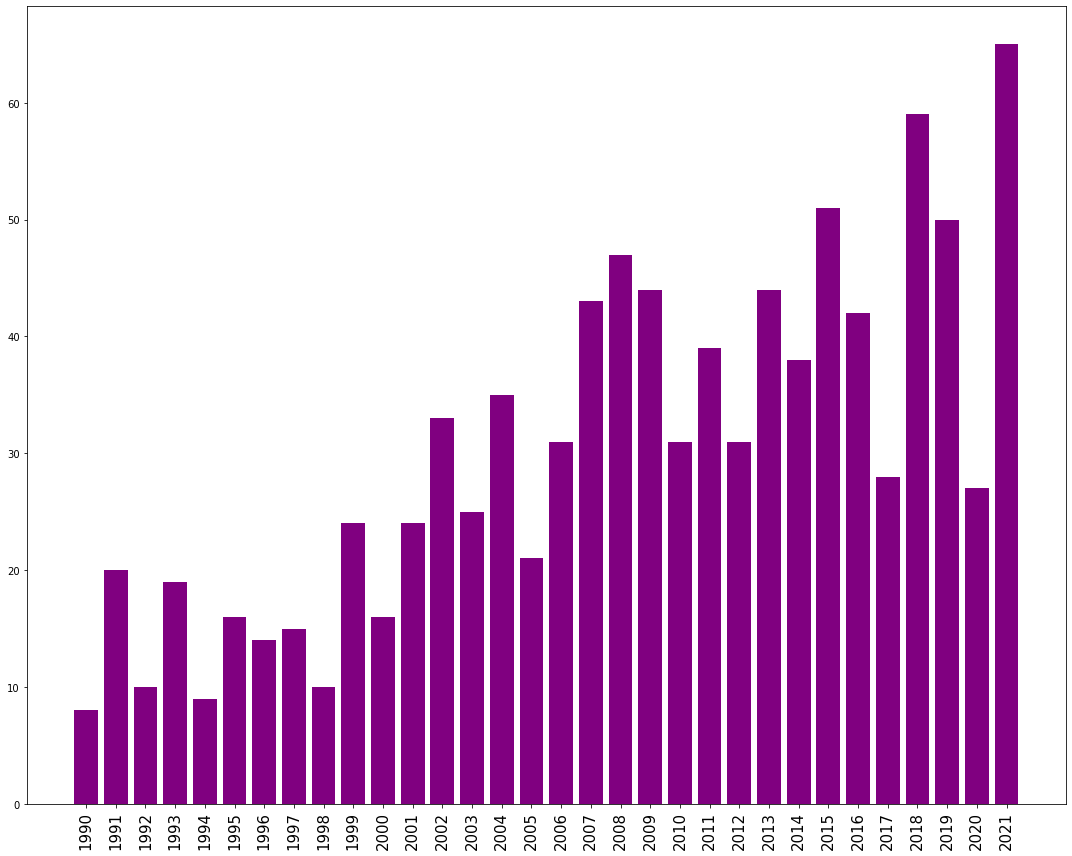

In [246]:
# Plotting the Math-CS collaboration bar graph
X=math_cs_colab_data.keys()
Y=math_cs_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y,color='purple')
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

In [247]:
# Collecting the yearly collaboration data between Statistics and Computer Science departments
stat_cs_colab_data = {}
stat_pubs_yearly = []
for PubYear in range(1990,2022):
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    stat_pubs_yearly.append(stat_pubs.shape[0])
    stat_cs_colab_data[str(PubYear)]=0
    for cats in stat_pubs['FOR (ANZSRC) Categories']:
        if '08' in extract_category_key(cats):
            stat_cs_colab_data[str(PubYear)]+=1
    for pub_id in cs_pubs['Publication ID']:
        if pub_id not in list(stat_pubs):
            cats = list(cs_pubs.loc[cs_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '0104' in extract_category_key(cats):
                math_cs_colab_data[str(PubYear)]+=1

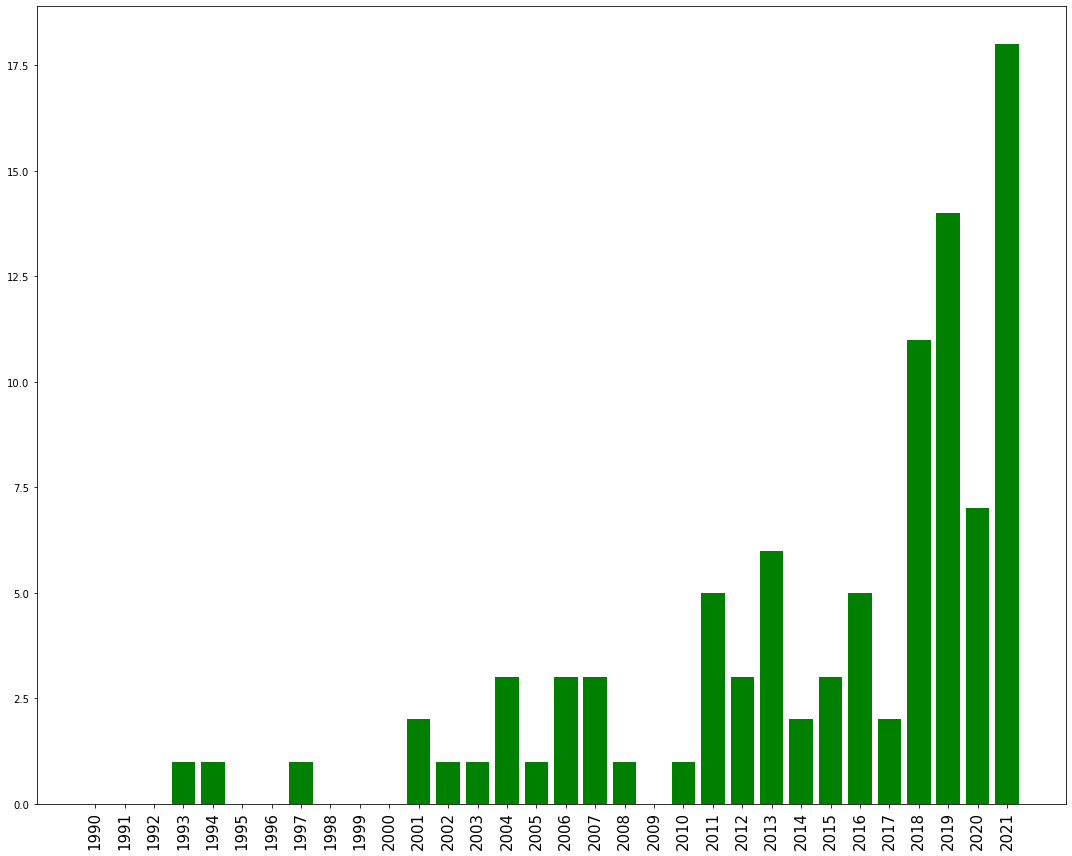

In [248]:
# Plotting the Stat-CS collaboration bar graph
X=stat_cs_colab_data.keys()
Y=stat_cs_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y, color='green')
#plt.plot(cs_pubs_yearly)
#plt.plot(stat_pubs_yearly)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

In [249]:
# Collecting the yearly collaboration data between Mathematics and Statistics departments
math_stat_colab_data = {}
for PubYear in range(1990,2022):
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    math_stat_colab_data[str(PubYear)]=0
    for cats in stat_pubs['FOR (ANZSRC) Categories']:
        if any(c in extract_category_key(cats) for c in ('0101','0102','0103','0105')):
            math_stat_colab_data[str(PubYear)]+=1
    for pub_id in math_pubs['Publication ID']:
        if pub_id not in list(stat_pubs):
            cats = list(math_pubs.loc[math_pubs['Publication ID']==pub_id]['FOR (ANZSRC) Categories'])[0]
            if '0104' in extract_category_key(cats):
                math_stat_colab_data[str(PubYear)]+=1
                


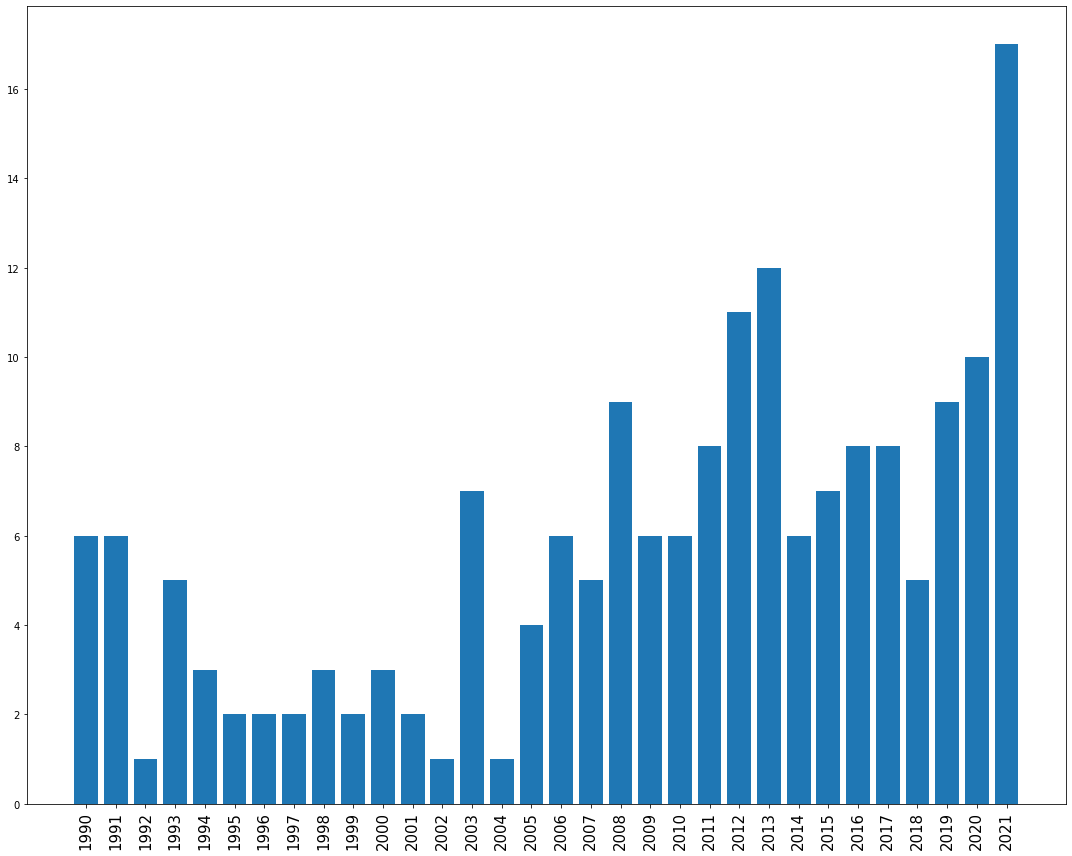

In [250]:
# Plotting the Stat-Math collaboration bar graph
X=math_stat_colab_data.keys()
Y=math_stat_colab_data.values()
plt.figure(figsize=(15, 12))
plt.bar(X, Y)
#plt.plot(math_pubs_yearly)
#plt.plot(stat_pubs_yearly)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()

In [ ]:
for PubYear in range(1990,2023):
    vizfile = open('visualization_files/vizfile_colab_%s.ris'%str(PubYear),'w')
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    physics_pubs = df_physics.loc[df_physics['PubYear']==PubYear]
    chem_pubs = df_chem.loc[df_chem['PubYear']==PubYear]
    bio_pubs = df_bio.loc[df_bio['PubYear']==PubYear]
    pubs = pd.concat([math_pubs, stat_pubs, cs_pubs, physics_pubs, chem_pubs, bio_pubs], axis=0)
    for r in range(pubs.shape[0]):
        article = pubs.iloc[r]
        if article['Publication ID'] not in list(pubs.iloc[:r-1]['Publication ID']):
            vizfile.write('\nTY  - %s'%article['Publication Type'])
            Authors = article['Authors'].split(';')
            for a in Authors:
                a = unidecode.unidecode(a)
                vizfile.write('\nAU  - %s'%a)
            vizfile.write('\nPY  - %s'%str(PubYear))
            Title = unidecode.unidecode(article['Title'])
            vizfile.write('\nTI  - %s'%Title)
            categories = extract_category_key(article['FOR (ANZSRC) Categories'])
            if any(c in categories for c in ('0101','0102','0103','0105')):
                vizfile.write('\nKW  - MATH')
            if '0104' in categories:
                vizfile.write('\nKW  - STAT')
            if '02' in categories:
                vizfile.write('\nKW  - PHYSICS')
            if '03' in categories:
                vizfile.write('\nKW  - CHEMISTRY')
            if '06' in categories:
                vizfile.write('\nKW  - BIOLOGY')
            if '08' in categories:
                vizfile.write('\nKW  - COMPUTER SCIENCE')
            
        vizfile.write('\nER  - \n')
    vizfile.close()

In [ ]:
colab_stat = {}
for PubYear in range(1990,2022):
    math_pubs = df_math.loc[df_math['PubYear']==PubYear]
    stat_pubs = df_stat.loc[df_stat['PubYear']==PubYear]
    cs_pubs = df_cs.loc[df_cs['PubYear']==PubYear]
    physics_pubs = df_physics.loc[df_physics['PubYear']==PubYear]
    chem_pubs = df_chem.loc[df_chem['PubYear']==PubYear]
    bio_pubs = df_bio.loc[df_bio['PubYear']==PubYear]
    pubs = pd.concat([math_pubs, stat_pubs, cs_pubs, physics_pubs, chem_pubs, bio_pubs], axis=0)
    D = {
        'math_stat' : 0,
        'math_cs' : 0,
        'math_physics' : 0,
        'math_chem' : 0,
        'math_bio' : 0,
        'stat_cs' : 0,
        'stat_physics' : 0,
        'stat_chem' : 0,
        'stat_bio' : 0,
        'cs_physics' : 0,
        'cs_chem' : 0,
        'cs_bio' : 0,
        'physics_chem' : 0,
        'physics_bio' : 0,
        'chem_bio' : 0,    
    }
    for r in range(pubs.shape[0]):
        article = pubs.iloc[r]
        if article['Publication ID'] not in list(pubs.iloc[:r-1]['Publication ID']):
            categories = extract_category_key(article['FOR (ANZSRC) Categories'])
            if any(c in categories for c in ('0101','0102','0103','0105')) and '0104' in categories:
                D['math_stat']+= 1
            if any(c in categories for c in ('0101','0102','0103','0105')) and '08' in categories:
                D['math_cs']+= 1
            if any(c in categories for c in ('0101','0102','0103','0105')) and '02' in categories:
                D['math_physics']+= 1
            if any(c in categories for c in ('0101','0102','0103','0105')) and '03' in categories:
                D['math_chem']+= 1
            if any(c in categories for c in ('0101','0102','0103','0105')) and '06' in categories:
                D['math_bio']+= 1
            if '0104' in categories and '08' in categories:
                D['stat_cs']+= 1
            if '0104' in categories and '02' in categories:
                D['stat_physics']+= 1
            if '0104' in categories and '03' in categories:
                D['stat_chem']+= 1
            if '0104' in categories and '06' in categories:
                D['stat_bio']+= 1
            if '08' in categories and '02' in categories:
                D['cs_physics']+= 1
            if '08' in categories and '03' in categories:
                D['cs_chem']+= 1
            if '08' in categories and '06' in categories:
                D['cs_bio']+= 1
            if '02' in categories and '03' in categories:
                D['physics_chem']+= 1
            if '02' in categories and '06' in categories:
                D['physics_bio']+= 1
            if '03' in categories and '06' in categories:
                D['chem_bio']+= 1
    D['math_stat'] = 2*D['math_stat']/(math_pubs.shape[0]+stat_pubs.shape[0])
    D['math_cs'] = 2*D['math_cs']/(math_pubs.shape[0]+cs_pubs.shape[0])
    D['math_physics'] = 2*D['math_physics']/(math_pubs.shape[0]+physics_pubs.shape[0])
    D['math_chem'] = 2*D['math_chem']/(math_pubs.shape[0]+chem_pubs.shape[0])
    D['math_bio'] = 2*D['math_bio']/(math_pubs.shape[0]+bio_pubs.shape[0])
    D['stat_cs'] = 2*D['stat_cs']/(stat_pubs.shape[0]+cs_pubs.shape[0])
    D['stat_physics'] = 2*D['stat_physics']/(stat_pubs.shape[0]+physics_pubs.shape[0])
    D['stat_chem'] = 2*D['stat_chem']/(stat_pubs.shape[0]+chem_pubs.shape[0])
    D['stat_bio'] = 2*D['stat_bio']/(stat_pubs.shape[0]+bio_pubs.shape[0])
    D['cs_physics'] = 2*D['cs_physics']/(cs_pubs.shape[0]+physics_pubs.shape[0])
    D['cs_chem'] = 2*D['cs_chem']/(cs_pubs.shape[0]+chem_pubs.shape[0])
    D['cs_bio'] = 2*D['cs_bio']/(cs_pubs.shape[0]+bio_pubs.shape[0])
    D['physics_chem'] = 2*D['physics_chem']/(physics_pubs.shape[0]+chem_pubs.shape[0])
    D['physics_bio'] = 2*D['physics_bio']/(physics_pubs.shape[0]+bio_pubs.shape[0])
    D['chem_bio'] = 2*D['chem_bio']/(chem_pubs.shape[0]+bio_pubs.shape[0])
    colab_stat[PubYear] = D

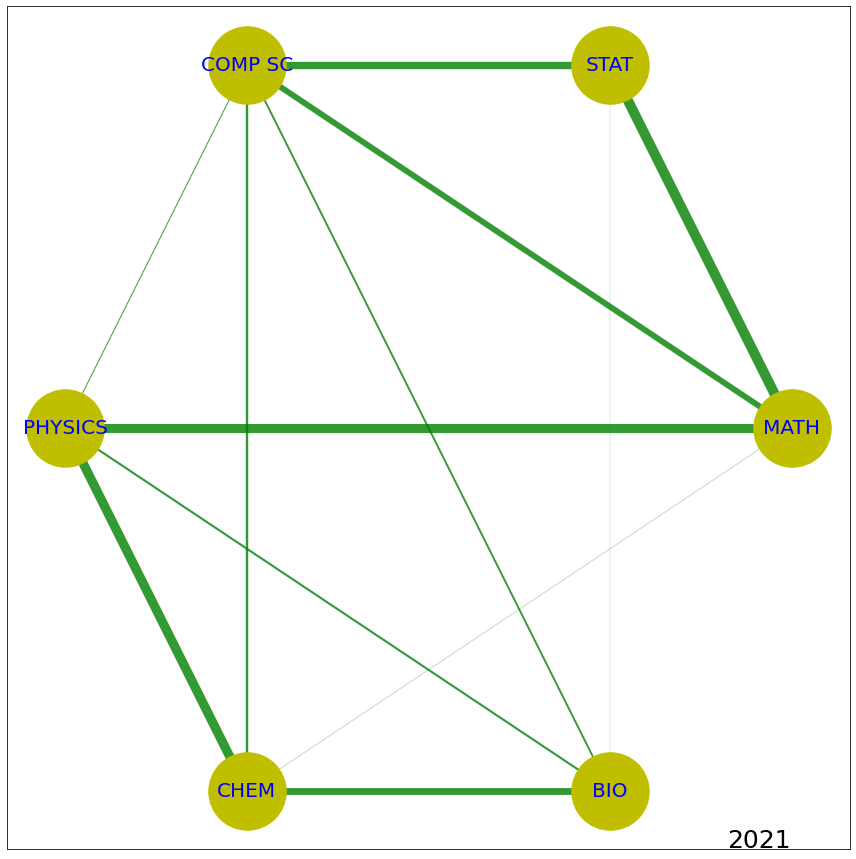

In [254]:
M = max([max(colab_stat[i].values()) for i in colab_stat.keys()])
for PubYear in range(1990,2022):
    plt.close('all')
    D = colab_stat[PubYear]
    G = nx.Graph()
    G.add_edge("MATH", "STAT", weight=D['math_stat']*15/M)
    G.add_edge("MATH", "COMP SC", weight=D['math_cs']*15/M)
    G.add_edge("MATH", "PHYSICS", weight=D['math_physics']*15/M)
    G.add_edge("MATH", "CHEM", weight=D['math_chem']*15/M)
    G.add_edge("MATH", "BIO", weight=D['math_bio']*15/M)
    G.add_edge("STAT", "COMP SC", weight=D['stat_cs']*15/M)
    G.add_edge("STAT", "PHYSICS", weight=D['stat_physics']*15/M)
    G.add_edge("STAT", "CHEM", weight=D['stat_chem']*15/M)
    G.add_edge("STAT", "BIO", weight=D['stat_bio']*15/M)
    G.add_edge("COMP SC", "PHYSICS", weight=D['cs_physics']*15/M)
    G.add_edge("COMP SC", "CHEM", weight=D['cs_chem']*15/M)
    G.add_edge("COMP SC", "BIO", weight=D['cs_bio']*15/M)
    G.add_edge("PHYSICS", "CHEM", weight=D['physics_chem']*15/M)
    G.add_edge("PHYSICS", "BIO", weight=D['physics_bio']*15/M)
    G.add_edge("CHEM", "BIO", weight=D['chem_bio']*15/M)

    #elarge = [(u, v, d) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    #esmall = [(u, v, d) for (u, v, d) in G.edges(data=True) if d["weight"] == 0]

    #pos = nx.spring_layout(G, seed = 8)  # positions for all nodes - seed for reproducibility
    #pos = nx.circular_layout(G)
    pos = nx.kamada_kawai_layout(G)
    plt.figure(3,figsize=(12,12)) 
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=6000, node_color = 'y', node_shape='o')
    #nx.draw_networkx(G,pos, node_size = 700)

    # edges
    for edge in G.edges(data=True):
        if edge[2]['weight']>0:
            nx.draw_networkx_edges(G, pos, edgelist=[edge], width= edge[2]['weight'], alpha = 0.8, edge_color = 'g', connectionstyle="angle3,rad=-0.4")
        #else:
            #nx.draw_networkx_edges(G, pos, edgelist = [edge], width = 6, alpha = 0.3, edge_color = 'b', style = 'dashed', connectionstyle="arc3,rad=0.1")


    #nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif", font_color = 'b')
    #nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4")

    nx.draw_shell
    ax = plt.gca()
    ax.margins(0.08)
    #plt.axis("off")
    plt.tight_layout()
    plt.xlabel(str(PubYear), fontsize=25)
    ax.xaxis.set_label_coords((PubYear-1988)/37, 0.025)
    #plt.figure(figsize=(20,10))
    #plt.show()
    plt.savefig('visualization_files/colab_%s.png'%str(PubYear))